In [43]:
#coding:utf-8
__author__ = 'Hanxiaoyang'

import warnings
warnings.filterwarnings("ignore")
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

In [44]:
# 加载数据
data=pd.read_csv('E:/Document/Literature/SourceCode/api_wordcloud_data.csv',encoding='ISO-8859-1') 

In [45]:
data = data.dropna()
content=data.content.values.tolist()

In [46]:
# 使用nltk对英文进行分词
import nltk
from nltk import word_tokenize

segment=[]
for line in content:
    try:
        segs = nltk.word_tokenize(text=line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

#### 去停用词

In [47]:
from nltk.corpus import stopwords
words_df=pd.DataFrame({'segment':segment})
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.words('english'))]

In [74]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg(numpy.size)
words_stat = words_stat.sort_values(ascending=False)
words_stat.head(10)

segment
api             13983
data             5158
users            4661
service          4326
allows           4277
provides         3730
developers       3665
access           3555
applications     3343
information      3267
Name: segment, dtype: int64

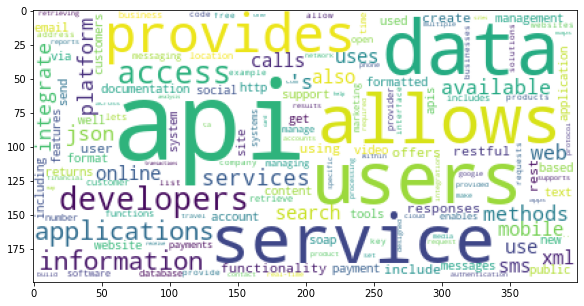

In [77]:
wordcloud=WordCloud(background_color="white",max_font_size=80)
# word_frequence = {for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(words_stat.head(1000))
plt.imshow(wordcloud)